In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_7131.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_8237.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_9862.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_8315.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_251.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_4534.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_63.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_11206.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_8224.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_11959.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_19677.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_825.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_12541.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_9409.JPEG
/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_61.JP

In [2]:
#Importing Libraries
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
from time import time
from tqdm import tqdm

In [3]:
# Setting up the device for GPU usage
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

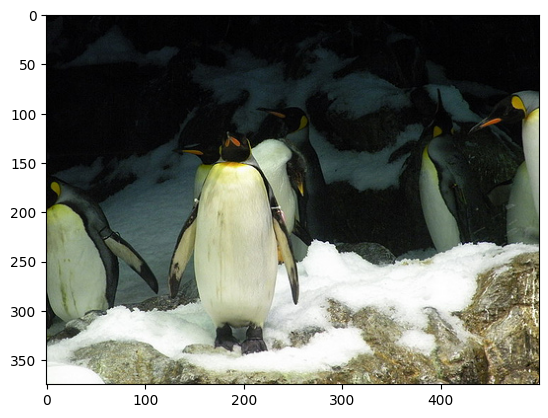

Label: /kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_8237.JPEG


In [6]:
# Visualizing an image and a label
import matplotlib.pyplot as plt
img = plt.imread('/kaggle/input/imagenet10/imagenet-10/n02056570/n02056570_8237.JPEG')
plt.imshow(img)
plt.show()

In [ ]:
# Creating the ResNet18 Model
model = torch.hub.load('pytorch/vision:v0.18.0', 'resnet18', pretrained=True)
model.eval()

In [ ]:
# Creating the transforms
transform = transforms.Compose([
    transforms.Resize(224,224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [7]:
# Loading the dataset
dataset = datasets.ImageFolder('/kaggle/input/imagenet10/imagenet-10', transform=transform)
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

In [8]:
# Move the model to device
model = model.to(device)

In [9]:
# Function to evaluate the model
def evaluate (model, data_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

In [12]:
# Evaluate on the dataset
accuracy = evaluate(model, data_loader, device)
print('Accuracy on the dataset: {:.2f}%'.format(accuracy))

Accuracy on the dataset: 0.01%
